###Question 1:
Generate a dataset for linear regression with 1000 samples, 5 features and single target.

Visualize the data by plotting the target column against each feature column. Also plot the best fit line in each case.

Hint : search for obtaining regression line using numpy.

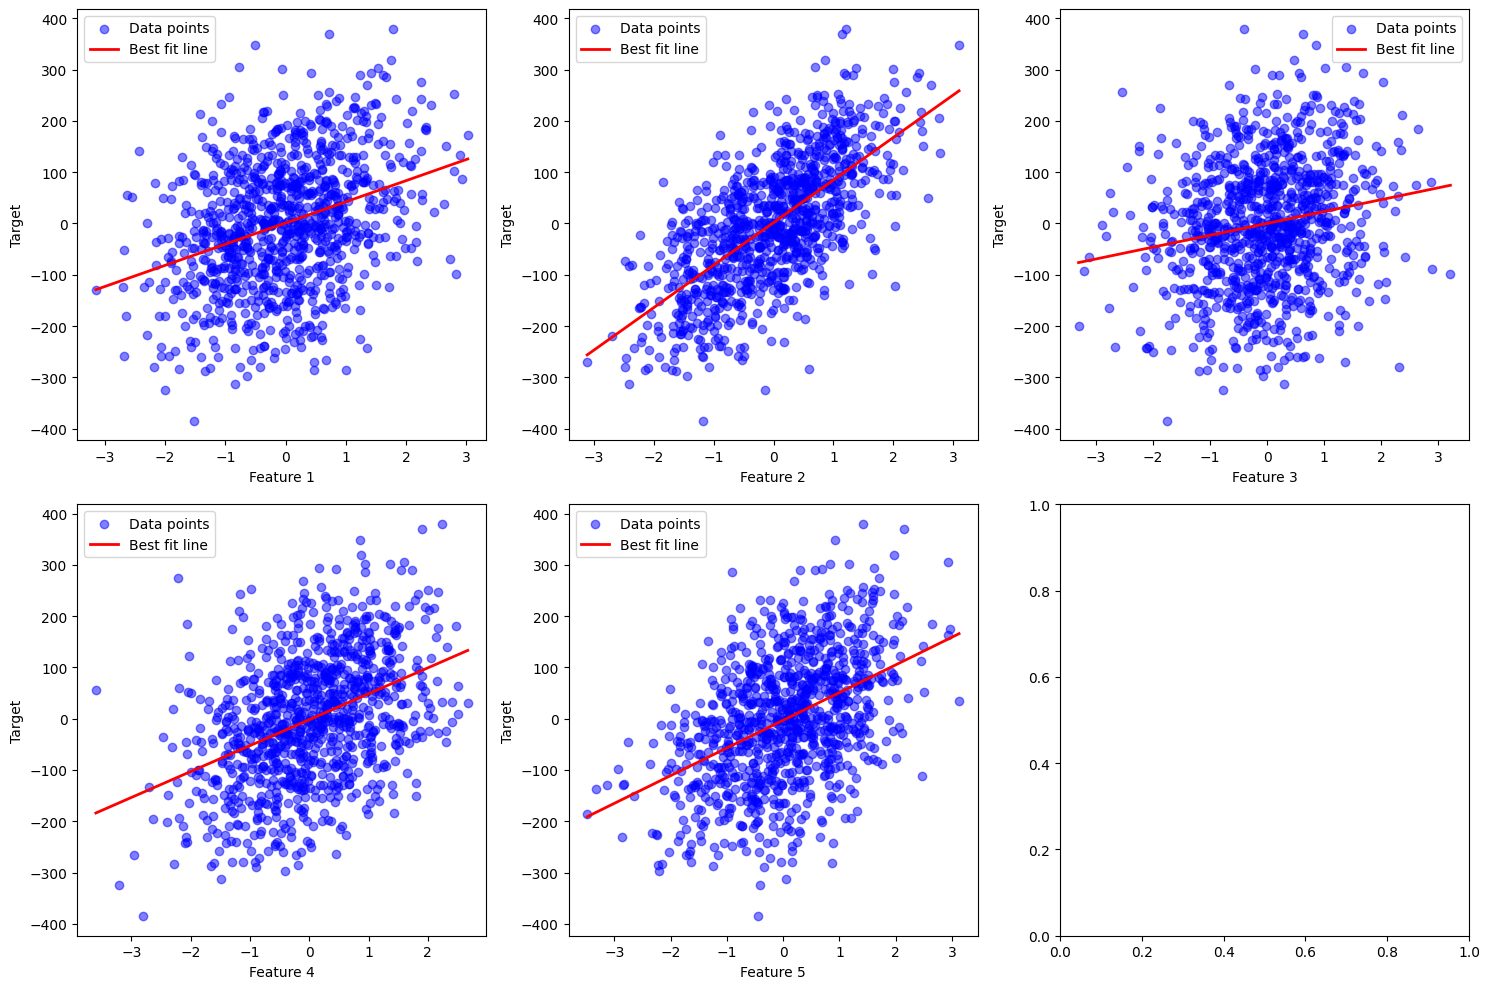

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression

# Generate a dataset for linear regression with 1000 samples, 5 features and single target
X, y = make_regression(n_samples=1000, n_features=5, noise=0)

# Create a subplot with 2 rows and 3 columns
fig, ax = plt.subplots(2from sklearn.datasets import make_classification
X,y= make_classification(n_samples=1000,n_features=2, n_informative=2, n_redundant=0,n_classes=2,n_clusters_per_class=2)
print(X.shape)
print(y.shape)

plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show(), 3, figsize=(15, 10))

# Flatten the axes array for easier iteration
ax = ax.flatten()

for i in range(5):
    # Scatter plot
    ax[i].scatter(X[:, i], y, color='blue', alpha=0.5, label='Data points')

    # Fit a regression line
    # Add a constant term for the intercept
    X_i = np.c_[np.ones(X.shape[0]), X[:, i]]
    coeffs = np.linalg.lstsq(X_i, y, rcond=None)[0]

    # Plot the regression line
    x_fit = np.linspace(X[:, i].min(), X[:, i].max(), 100)
    y_fit = coeffs[0] + coeffs[1] * x_fit
    ax[i].plot(x_fit, y_fit, color='red', linewidth=2, label='Best fit line')

    # Set labels and title
    ax[i].set_xlabel(f'Feature {i+1}')
    ax[i].set_ylabel('Target')
    ax[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


### Question 2:
Make a classification dataset of 1000 samples with 2 features, 2 classes and 2 clusters per class.
Plot the data.

(1000, 2)
(1000,)


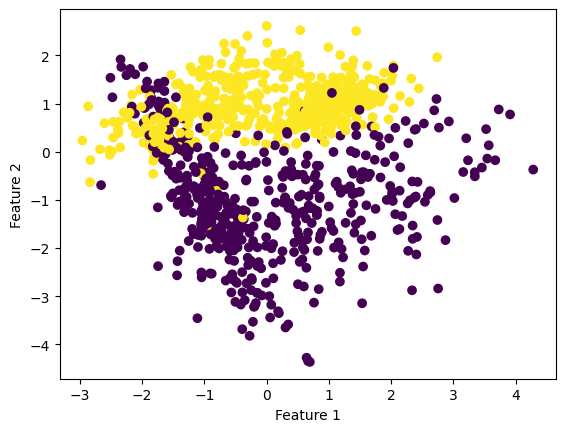

In [ ]:
from sklearn.datasets import make_classification
X,y= make_classification(n_samples=1000,n_features=2, n_informative=2, n_redundant=0,n_classes=2,n_clusters_per_class=2)
print(X.shape)
print(y.shape)

plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000, centers=4, n_features=2)
print(X.shape)
print(y.shape)

plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Question 3:
Make a clustering dataset with 2 features and 4 clusters.

(1000, 2)
(1000,)


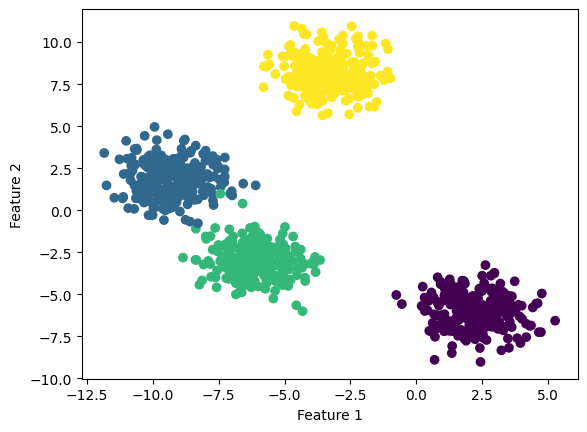

In [ ]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000, centers=4, n_features=2)
print(X.shape)
print(y.shape)

plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Question 4
Go to the website https://www.worldometers.info/coronavirus/ and scrape the table containing covid-19 infection and deaths data using requests and BeautifulSoup.  Convert the table to a Pandas dataframe with the following columns : Country, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths,TotalRecovered, NewRecovered,  ActiveCases.

*(<b>Optional Challenge :</b> Change the data type of the Columns (Population ... till ActiveCases) to integer. For that you need to remove the commas and plus signs. You may need to use df.apply() and pd.to_numeric() . Take care of the values which are empty strings.)

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.worldometers.info/coronavirus/'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table', id='main_table_countries_today')

headers = [header.text.strip() for header in table.find_all('th')]
rows = table.find_all('tr')

data = []

for row in rows:
    cells = row.find_all('td')
    if len(cells) > 0:
        row_data = [cell.text.strip() for cell in cells]
        data.append(row_data)

df = pd.DataFrame(data, columns=headers)
df = df[['Country,Other', 'Continent', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases']]
df.columns = ['Country', 'Continent', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases']

def clean_and_convert(column):
    return pd.to_numeric(df[column].str.replace(',', '').str.replace('+', ''), errors='coerce').fillna(0).astype(int)

for column in ['Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases']:
    df[column] = clean_and_convert(column)


In [10]:
df.head()

,Country,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
0,North America,North America,0,131889132,0,1695941,0,127665129,350,2528062
1,Asia,Asia,0,221500265,0,1553662,0,205673091,0,14273512
2,Europe,Europe,0,253406198,0,2101824,0,248754104,474,2550270
3,South America,South America,0,70200879,0,1367332,0,66683585,0,2149962
4,Oceania,Australia/Oceania,0,14895771,0,33015,0,14752388,0,110368


# Question 5

Generate an imbalanced classification dataset using sklearn of 1000 samples with 2 features, 2 classes and 1 cluster per class. Plot the data. One of the class should contain only 5% of the total samples. Confirm this either using numpy or Counter. Plot the data.

Now oversample the minority class to 5 times its initial size using SMOTE. Verify the number. Plot the data.

Now undersample the majority class to 3 times the size of minority class using RandomUnderSampler. Verify the number. Plot the data.

Reference : Last markdown cell of the examples.

Class distribution: Counter({0: 950, 1: 50})
Class 0: 950, Class 1: 50


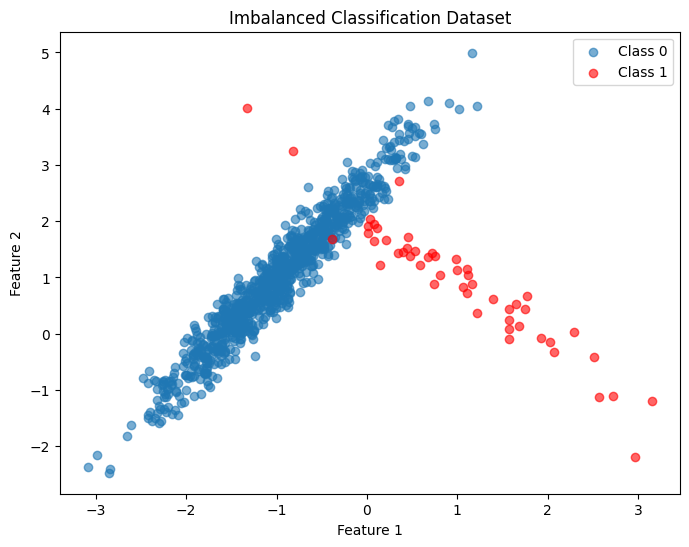

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from collections import Counter

# Generate the dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.95, 0.05], flip_y=0, random_state=42)

# Confirm the imbalance
counter = Counter(y)
print(f'Class distribution: {counter}')
print(f'Class 0: {counter[0]}, Class 1: {counter[1]}')

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', alpha=0.6)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', alpha=0.6, color='r')
plt.title('Imbalanced Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


Initial class distribution: Counter({0: 950, 1: 50})
Resampled class distribution: Counter({0: 950, 1: 250})


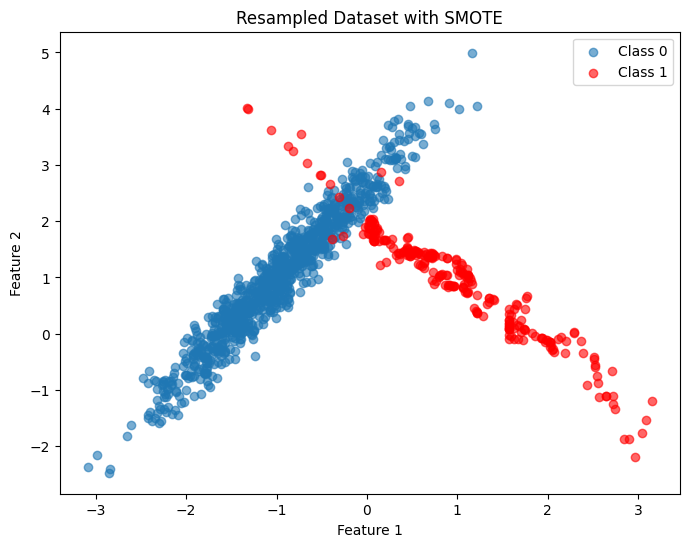

In [14]:
from imblearn.over_sampling import SMOTE

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.95, 0.05], flip_y=0, random_state=42)

counter = Counter(y)
print(f'Initial class distribution: {counter}')

smote = SMOTE(sampling_strategy={1: counter[1] * 5}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

counter_resampled = Counter(y_resampled)
print(f'Resampled class distribution: {counter_resampled}')


plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], label='Class 0', alpha=0.6)
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], label='Class 1', alpha=0.6, color='r')
plt.title('Resampled Dataset with SMOTE')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


Initial class distribution: Counter({0: 950, 1: 50})
Resampled class distribution: Counter({0: 150, 1: 50})


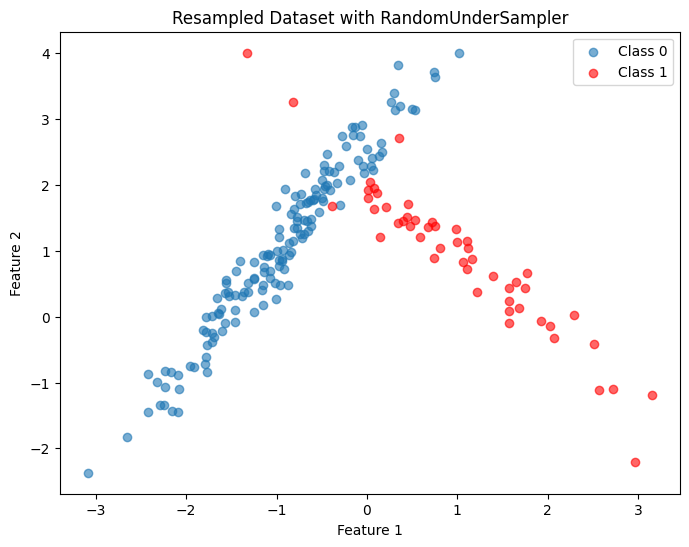

In [15]:
from imblearn.under_sampling import RandomUnderSampler


X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.95, 0.05], flip_y=0, random_state=42)


counter = Counter(y)
print(f'Initial class distribution: {counter}')

rus = RandomUnderSampler(sampling_strategy={0: counter[1] * 3, 1: counter[1]}, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

counter_resampled = Counter(y_resampled)
print(f'Resampled class distribution: {counter_resampled}')


plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], label='Class 0', alpha=0.6)
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], label='Class 1', alpha=0.6, color='r')
plt.title('Resampled Dataset with RandomUnderSampler')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


##Question 6

Write a Python code to perform data preprocessing on a dataset using the scikit-learn library. Follow the instructions below:

 * Load the dataset using the scikit-learn `load_iris` function.
 * Assign the feature data to a variable named `X` and the target data to a variable named `y`.
 * Create a pandas DataFrame called `df` using `X` as the data and the feature names obtained from the dataset.
 * Display the first 5 rows of the DataFrame `df`.
 *  Check if there are any missing values in the DataFrame and handle them accordingly.
 * Split the data into training and testing sets using the `train_test_split` function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.
 * Print the dimensions of the training set and testing set respectively.
 *  Standardize the feature data in the training set using the `StandardScaler` from scikit-learn.
 *  Apply the same scaling transformation on the testing set.
 * Print the first 5 rows of the standardized training set.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset using the scikit-learn load_iris function.
iris = load_iris()

# Assign the feature data to a variable named X and the target data to a variable named y.
X = iris.data
y = iris.target

# Create a pandas DataFrame called df using X as the data and the feature names obtained from the dataset.
feature_names = iris.feature_names
df = pd.DataFrame(X, columns=feature_names)

# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

# Check if there are any missing values in the DataFrame and handle them accordingly.
print("\nMissing values in the DataFrame:")
print(df.isnull().sum())

# Split the data into training and testing sets using the train_test_split function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the dimensions of the training set and testing set respectively.
print("\nDimensions of the training set and testing set:")
print(f"Training set: X_train shape = {X_train.shape}, y_train shape = {y_train.shape}")
print(f"Testing set: X_test shape = {X_test.shape}, y_test shape = {y_test.shape}")

# Standardize the feature data in the training set using the StandardScaler from scikit-learn.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling transformation on the testing set.
X_test_scaled = scaler.transform(X_test)

# Print the first 5 rows of the standardized training set
print("\nFirst 5 rows of the standardized training set:")
print(pd.DataFrame(X_train_scaled, columns=feature_names).head())


First 5 rows of the DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Missing values in the DataFrame:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Dimensions of the training set and testing set:
Training set: X_train shape = (105, 4), y_train shape = (105,)
Testing set: X_test shape = (45, 4), y_test shape = (45,)

First 5 rows of the standardized training set:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.413416         -1.462003          -0.099511         -0.323398
1   